# Decision Trees Webinar

### Allie Surina, Marketing Data Scientist


![AllieSurina](images/Allie sm Pic.png)

## Overview:

- ### Why we use decisions trees
- ### Decision Tree Review
- ### Decision Tree Real Life Application Examples
- ### Definitions
- ### Evaluating Trees with Entropy, Information Gain, Gini Impurity
- ### Examples of Decision Trees with Visuals, for Two Datasets 
- ### Bagging Classifier Example

## _"The possible solutions to a given problem emerge as the leaves of a tree, each node representing a point of deliberation and decision.” - Niklaus Wirth (1934 — )_

## Why we use decisions trees / random forests

- Sometimes we can't get separation of our target values with the linear hyperplanes we have been construction 
- The mapping between our xs and our ys is not always linear
- Decision trees map regression and classification problems very well
- Decision trees make no assumptions about the distribution of the data
- The main splitting decisions in decision trees can act as a feature selection tool, helping decision-makers locate which subset of variables are most important to accurate predictions.
- __The knowledge discovered by a decision tree exists (and can be plotted) in a hierarchical structure, which can easily be understood by non-technical individuals__

 
 
 
 
 
     -

## Decision Tree Info:

![Credit_Risk](images/ex_tree_credit_risk_tree.jpg)

 ![CarMileage](images/car_mileage_dt.png)

 ![Cats](images/cats-decision-making-tree.jpg)

## Decision Tree Real Life Application Examples:

- Investigate the relationships between customers’ needs and preferences and the making purhcases online, classifying those who rarely shopped online versus those who frequently shopped online.
        - Results of model: 
        - Time customers need to spend in a transaction and how urgent customers need to purchase a product are 
        most important factors in classifying users who rarely use onling shopping. 
        - Price and the degree of human resources involved in past purchases are the most important factors in classifying users who rarely use online shopping. 
        - Results also suggested information useful for understanding customer needs and preferences.
        
- Tso and Yau (2007) created a decision tree model to identify the relationships between a household and its electricity consumptions in Hong Kong. 
        - Results of model:
        - The number of household members are the most determinant factor of energy consumption in summer
        - Both the number of air-conditioner and the size of a flat are the second most important factors. 
        - Model identified that a household with four or more members with a flat size larger than 817ft2 is the highest electricity consumption group. 
        - Households having less than four family members and without air-conditioners are the smallest electricity consumption group. 
        - Such findings from decision trees not only provide a deeper insight of the electricity consumptions within an area but also give guidelines to electricity companies about the right time they need to generate more electricity.
        
- Chang (2007) developed a healthcare decision tree model to explore the hidden knowledge located within the medical history of developmentally-delayed children. 
        - Results of model: The  model identified that the majority of illnesses will result in delays in cognitive development, language development, and motor development.
        - Such findings assist healthcare professionals to create early intervention for developmentally-delayed children so as to help them catch up their normal peers in their development and growth. 
        
- Classifying likely buyers of a product, using demographic data, which allows better targeting of advertising with smaller spend.
- Emergency Room patient prioritization using a decision tree model that inputs of age, blood pressure, gender, location and severity of pain, and other measurements found to be the most important splitting criteria for predicting who will survive.


* ## Remember that decision trees will find the most important variable and its most important value that will best split the data.

## Definitions:
- ### Root Node: 
    * It represents entire population or sample and this further gets divided into two or more homogeneous sets.
- ### Splitting: 
    * Dividing a node into two or more sub-nodes by a dimension criteria
- ### Decision Node: 
    * When a sub-node splits into further sub-nodes, then it is called decision node.
- ### Leaf/ Terminal Node: 
    * Any node that has no splits beyond it
- ### Pruning: 
    * Removing sub-nodes of a decision node to correct for overfitting / over-splitting
- ### Branch / Sub-Tree: 
    * A sub section of entire tree is called branch or sub-tree.
- ### Parent / Child Node: 
    * A node, which is divided into sub-nodes is called parent node of sub-nodes whereas sub-nodes are the child of parent node.

## Evaluating Decision Trees:

- ### Entropy:  You can use Scipy Stats base (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html)
    Entropy is used to calculate the homogeneity of a sample. If the sample is completely homogeneous the entropy is zero and if the sample is an equally divided it has entropy of one.

![Entropy](images/Entropy.png)

---

![EntropySimpleCal](images/Entropy_calc.png)

- ### Information Gain:
     Information gain (IG) measures how much “information” a feature gives us about the class.
 The information gain is based on the decrease in entropy after a dataset is split on an dimension. 
 Decision trees maximize information gain, and the dimension with the highest information gain is usually split first.

 - Step 1: Calculate the entropy of your target variable as a starting point: we found it to be 0.94.

 - Step 2: The data is  split on all the different dimensions. The entropy for each branch created is calculated, then it is added proportionally, to get total entropy for the split. 
 The resulting entropy is subtracted from the original entropy (0.94). 
 The result is the __Information Gain__, or __decrease in entropy__. 
 
 ![EntropySplit](images/EntropySplitting.png)

![Gain](images/Entropy_gain.png)

<br>
<br>
<br>
   - Step 3: Choose attribute with the largest information gain as the decision node, divide the dataset by its branches and repeat the same process on every branch.

![BestAttribute](images/Entropy_attribute_best.png)

![slices](images/decision_tree_slices.png)

- Step 4: A branch with entropy of 0 is a leaf node. A branch with entropy more than 0 needs further splitting.	
<br>
<br>
<br>

- ### Gini impurity (not gini coefficient):

    Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. (Think, if the mean of the subset was Label A, and all the points in that set were labeled as A, what proportion of the time would that be not true?)
    
<br>
<br>
    
- The Gini impurity can be computed by summing the probability of an item with label i being chosen times the probability of a mistake in categorizing that item. It reaches its minimum (zero) when all cases in the node fall into a single target category.

<br>
<br>
<br>
<br>

## Example 1: Admissions Data (in assets)

### Install and load the packages required to visually show decision tree branching

You will need to first:

- Install `graphviz`  `pip install graphviz`
- Install `pydotplus` with `pip install pydotplus`
- Load the packages as shown below (you may need to restart your kernel after the installations.)

In [1]:
# Use graphviz to make a chart of the regression tree decision points:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [2]:
# Import typical packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
# Load admissions data
admit = pd.read_csv('datasets/admissions.csv')

In [4]:
admit.head()

admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0

### Create regression and classification X, y data

The regression data will be:

    X_reg = [admit, gre, prestige]
    y_reg = gpa
    
The classification data will be:

    X_class = [gre, gpa, prestige]
    y_class = admit

In [5]:
# Drop the nulls instead of imputing right now, to save time
admit = admit.dropna()
admit.head()

admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0

## Two Models, One Data Set:

- We are going to use GPA as the target for our regression
- Admission {0,1} will be the value of our classification, we'll just modify it to be {-1,1}

In [6]:
# Change values of admit column from {0,1} to {-1, 1}
y_class_1 = [-1 if k == 0 else k for k in admit['admit']]
y_class_0 = admit['admit'].values

In [7]:
# Number of total observations: 397
admit['admit'].shape

(397,)

In [8]:
# Number of targets = +1: 127, so pretty balanced
admit['admit'].sum()

126

In [9]:
# What is the entropy of this pretty balanced data? 
import scipy.stats as st
target_1 = admit['admit'].sum() # 126 of label 1
target_2 = admit.shape[0] - admit['admit'].sum()
print(st.entropy([target_1,target_2],base=2))

0.9015099060399636


In [10]:
# Create our X,y sets for decision tree regression and classifer models
X_reg = admit[['admit','gre','prestige']].copy()
y_reg = admit.gpa.values

X_class = admit[['gpa','gre','prestige']].copy()

In [14]:
from sklearn.model_selection import train_test_split

# Create tts 
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class_0,test_size = .25, random_state = 42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size = 0.25, random_state =42)

---


### Fit Linear Regression and Logistic Regression to See Performance

- Fit a linear regression for the regression problem and a logistic for the classification problem. Cross-validate the R2 and accuracy scores.

In [13]:
# import packages
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score

In [15]:
# Cross validate the Linear Regression using 4 folds
reg_scores = cross_val_score(LinearRegression(), X_train_reg, y_train_reg, cv=4)

# Cross Validate Logistic Regression using 4 folds and make sure to use the {0,1} based admit scores
cls_scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=4)

#get scores
print('Linear Regression Scores:',reg_scores, np.mean(reg_scores))
print('Logistic Regression Scores:',cls_scores, np.mean(cls_scores))

# fit models
linreg = LinearRegression().fit(X_train_reg, y_train_reg) #R2
logreg = LogisticRegression().fit( X_train, y_train) #accuracy

Linear Regression Scores: [0.16836305 0.14491446 0.0812648  0.07221311] 0.11668885375998109
Logistic Regression Scores: [0.70666667 0.75675676 0.74324324 0.67567568] 0.7205855855855856


### How did linear and logistic do in terms of bias-variance trade off?

---

---

## Building regression trees

With `DecisionTreeRegressor`:

1. We will build 4 models with different hyperparameter values for `max_depth`: `max_depth=1`, `max_depth=2`, `max_depth=3`, and `max_depth=None`
2. We will cross-validate the R2 scores of each of the models and compare to the linear regression earlier.

In [20]:
# Import packages for DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

In [17]:
# Instantiate 4 models for max depth at [1, 2, 3, None]
dtr1 = DecisionTreeRegressor(max_depth=1)
dtr2 = DecisionTreeRegressor(max_depth=2)
dtr3 = DecisionTreeRegressor(max_depth=3)
dtrN = DecisionTreeRegressor(max_depth=None)

In [18]:
# Fit each of the models:
# fit the 4 models
dtr1.fit(X_reg, y_reg)
dtr2.fit(X_reg, y_reg)
dtr3.fit(X_reg, y_reg)
dtrN.fit(X_reg, y_reg)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [19]:
# Cross validate each of the 4 models
dtr1_scores = cross_val_score(dtr1, X_reg, y_reg, cv=4)
dtr2_scores = cross_val_score(dtr2, X_reg, y_reg, cv=4)
dtr3_scores = cross_val_score(dtr3, X_reg, y_reg, cv=4)
dtrN_scores = cross_val_score(dtrN, X_reg, y_reg, cv=4)

# score the 4 models
print("Decision Regressor max depth 1: ",dtr1_scores, np.mean(dtr1_scores))
print("Decision Regressor max depth 2: ",dtr2_scores, np.mean(dtr2_scores))
print("Decision Regressor max depth 3: ",dtr3_scores, np.mean(dtr3_scores))
print("Decision Regressor max depth None:", dtrN_scores, np.mean(dtrN_scores))

Decision Regressor max depth 1:  [0.16618105 0.1535036  0.03860296 0.10081223] 0.11477496110421084
Decision Regressor max depth 2:  [0.20722899 0.14179888 0.04112242 0.11836674] 0.12712925798583766
Decision Regressor max depth 3:  [0.15422529 0.123802   0.05252648 0.08070045] 0.10281355747790255
Decision Regressor max depth None: [-0.15151731 -0.15842446 -0.46738791 -0.19259235] -0.24248050569779078


In [24]:
cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv = 4)

array([0.57333333, 0.67567568, 0.7027027 , 0.64864865])

---

---

## Visualizing Regression Tree Decisions

Charts that show the splitting of the four decision tree regressions from above.

### Interpreting a regression tree diagram

- First line is the condition used to split that node (go left if true, go right if false)
- `samples` is the number of observations in that node before splitting
- `mse` is the mean squared error calculated by comparing the actual response values in that node against the mean response value in that node
- `value` is the mean response value in that node


_For reference: this method of showing the model creates a output file using graphviz that then gets read in using pydotplus._

### Max Depth 1

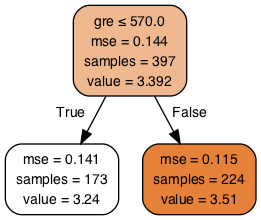

In [29]:
# Import packages if you did not already do this:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# initialize the output file object
dot_data = StringIO() 

# my fit DecisionTreeRegressor object here is: dtr1
# for feature_names i put the columns of my Xr matrix
export_graphviz(dtr1, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True,
                feature_names=X_reg.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

### We start with our predicted  GPA in the root node of 3.392 based on 397 observations
    - Predicted average GPA based on gre <= 570 to be 3.24
    - Predicted average GPA for gre > 570 is 3.51

### Max Depth 2

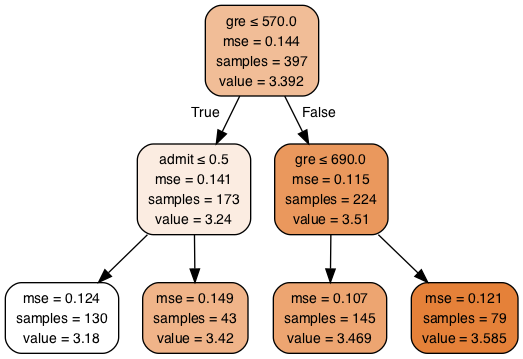

In [30]:
# max depth = 2
dot_data = StringIO()  

export_graphviz(dtr2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X_reg.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

### We start with our predicted GPA in the root node of 3.392 based on 397 observations
    - For gre <= 570, the subnode is split on admit <= 0.5 {0,1}- values
        - Predicted GPA for those with admit of 0 will be 3.18
        - Predicted GPA for those with admit of 1 will be 3.42
    - For gre > 570, the subnode splits on gre again, with <= 690 being the criteria
        - Predicted GPA for gre <= 690 is 3.469
        - Predicted GPA for gre > 690 is 3.585

### Max Depth 3

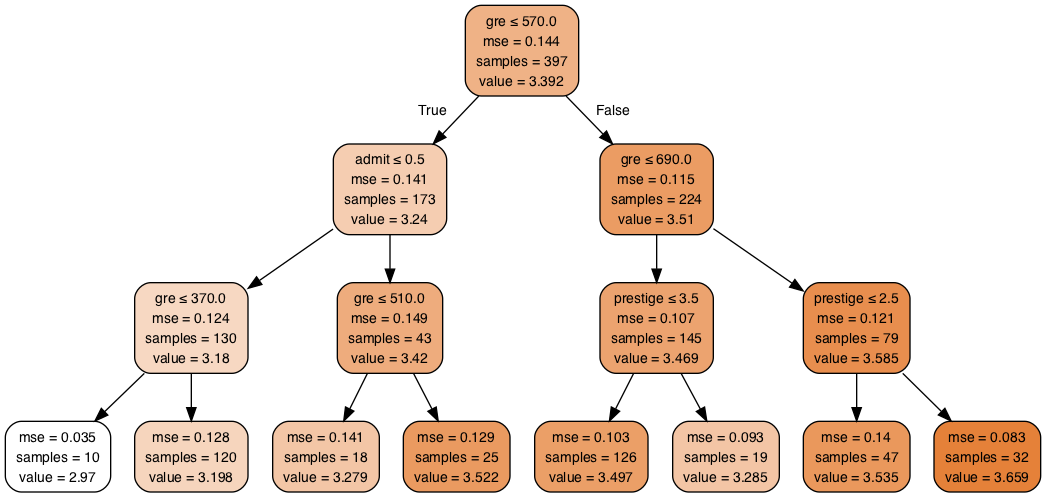

In [31]:
# max depth = 3
dot_data = StringIO()  

export_graphviz(dtr3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X_reg.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

### Max Depth None!

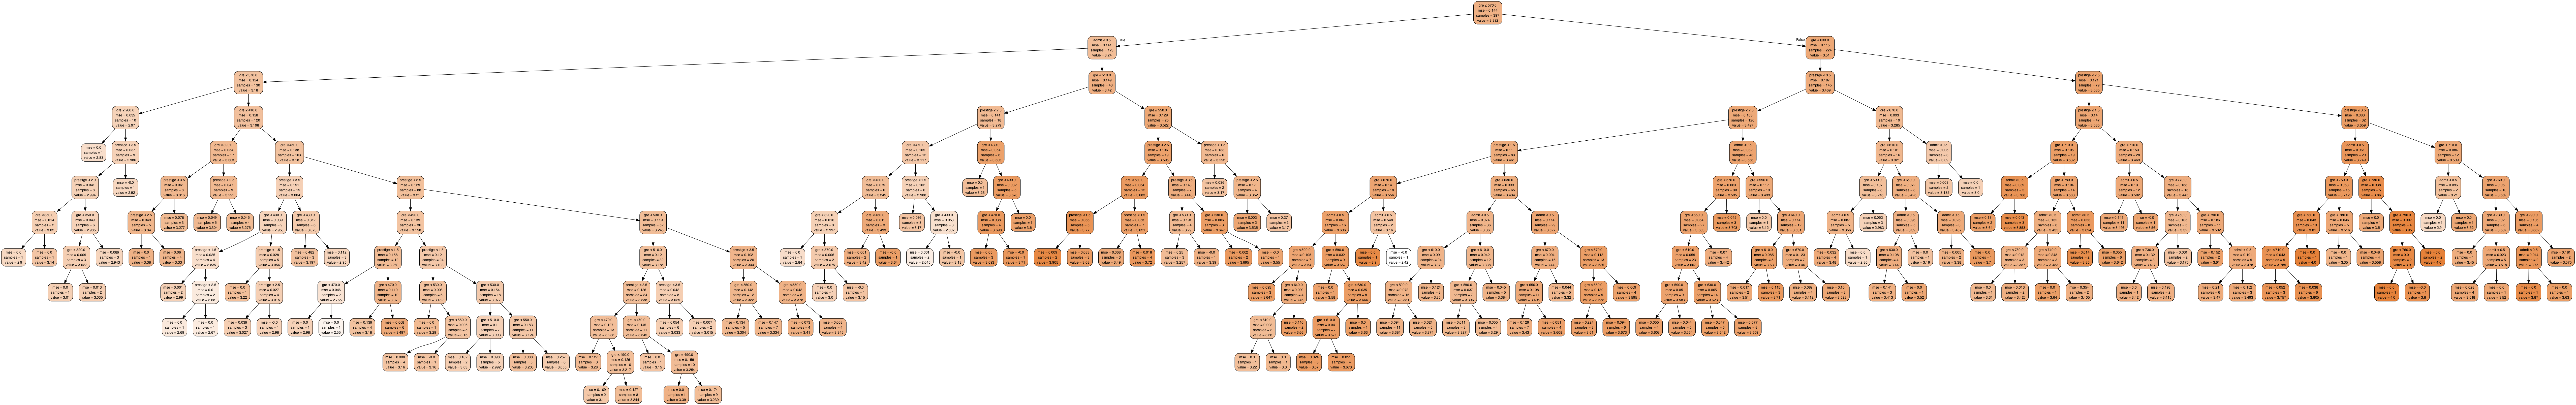

In [33]:
# max_depth = none 
# keeps creating trees until purity = 1
dot_data = StringIO()  

export_graphviz(dtrN, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X_reg.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

---

# Building classification trees

With `DecisionTreeClassifier`:

1. Again build 4 models with different parameters for `max_depth`: `max_depth=1`, `max_depth=2`, `max_depth=3`, and `max_depth=None`
2. Cross-validate the accuracy scores of each of the models and compare to the logistic regression earlier.

Note that now you'll be using the classification task where we are predicting `admit`.

In [34]:
# Import package
from sklearn.tree import DecisionTreeClassifier

In [35]:
# Instantiate 4 trees
dtc1 = DecisionTreeClassifier(max_depth=1)
dtc2 = DecisionTreeClassifier(max_depth=2)
dtc3 = DecisionTreeClassifier(max_depth=3)
dtcN = DecisionTreeClassifier(max_depth=None)

In [36]:
# Fit the 4 trees
dtc1.fit(X_class, y_class)
dtc2.fit(X_class, y_class)
dtc3.fit(X_class, y_class)
dtcN.fit(X_class, y_class)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
cross_val_score(dtc1, X_class, y_class, cv=4).mean()

In [39]:
# Cross Validation to evaluate the 4 trees using 4 folds:
dtc1_scores = cross_val_score(dtc1, X_class, y_class, cv=4)
dtc2_scores = cross_val_score(dtc2, X_class, y_class, cv=4)
dtc3_scores = cross_val_score(dtc3, X_class, y_class, cv=4)
dtcN_scores = cross_val_score(dtcN, X_class, y_class, cv=4)

print("Decision Classifier max depth 1: ",dtc1_scores, 'Mean score:', np.mean(dtc1_scores))
print("Decision Classifier max depth 2: ",dtc2_scores,'Mean score:',  np.mean(dtc2_scores))
print("Decision Classifier max depth 3: ",dtc3_scores, 'Mean score:', np.mean(dtc3_scores))
print("Decision Classifier max depth None:",dtcN_scores, 'Mean score:', np.mean(dtcN_scores))

Decision Classifier max depth 1:  [0.68       0.68       0.66666667 0.68367347] Mean score: 0.6775850340136055
Decision Classifier max depth 2:  [0.69       0.77       0.62626263 0.62244898] Mean score: 0.6771779014636158
Decision Classifier max depth 3:  [0.77       0.77       0.60606061 0.70408163] Mean score: 0.7125355596784169
Decision Classifier max depth None: [0.62       0.69       0.58585859 0.54081633] Mean score: 0.6091687280972995


### Classification Report 
- Docs: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
- Docs for Precision-Recall: https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html
- Outputs: precision, recall, f1-score, support

- Precision is the number of true positives classified divided by all the positives classified (including the false positives). A high precision relates to a low false positive rate.
- Recall is the ability to find all the positive samples. It is calculated by dividing the number of true positives classified by the sum of the true positives + false negatives. 
- __Depending on your business, you may care more about one or the other__
- The f1-score gives you the harmonic mean of precision and recall. 
- The support is the number of samples of the true response that lie in that class.
- The last line gives a weighted average of precision, recall and f1-score where the weights are the support values.

In [84]:
# Import package for classification report:
from sklearn.metrics import classification_report

In [90]:
dtc1.fit(X_train, y_train)
print("Decision Tree, Max Depth 1: \n", classification_report(y_test, dtc1.predict(X_test)), "\n")
print("-----------")

dtc2.fit(X_train, y_train)
print("Decision Tree, Max Depth 2: \n", classification_report(y_test, dtc2.predict(X_test)), "\n")
print("-----------")
dtc3.fit(X_train, y_train)

print("Decision Tree, Max Depth 3: \n", classification_report(y_test, dtc3.predict(X_test)), "\n")
print("-----------")
dtcN.fit(X_train, y_train)

print("Decision Tree, Max Depth None: \n", classification_report(y_test, dtcN.predict(X_test)), "\n")
print("-----------")

Decision Tree, Max Depth 1: 
              precision    recall  f1-score   support

         -1       0.63      1.00      0.77        63
          1       0.00      0.00      0.00        37

avg / total       0.40      0.63      0.49       100
 

-----------
Decision Tree, Max Depth 2: 
              precision    recall  f1-score   support

         -1       0.65      0.83      0.73        63
          1       0.45      0.24      0.32        37

avg / total       0.58      0.61      0.58       100
 

-----------
Decision Tree, Max Depth 3: 
              precision    recall  f1-score   support

         -1       0.62      0.81      0.70        63
          1       0.33      0.16      0.22        37

avg / total       0.52      0.57      0.52       100
 

-----------
Decision Tree, Max Depth None: 
              precision    recall  f1-score   support

         -1       0.69      0.76      0.72        63
          1       0.50      0.41      0.45        37

avg / total       0.62      0

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### What are the scores telling us?
- Classification does much better than its counterparts.  We can start to see how achieving completely pure leaves creates overfitting as `max_depth = none` is the worse performing model.

---

## Visualize the classification trees

The plotting code will be the same as for regression, you just need to change the model you're using for each plot and the feature names.

The output changes somewhat from the regression tree chart. Earlier it would give the MSE of that node, but now there is a line called `value` that tells you the count of each class at that node.

### Max Depth 1

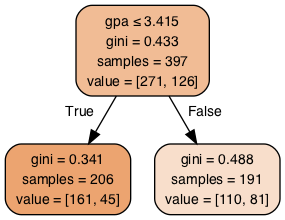

In [40]:
# max_depth = 1
dot_data = StringIO()  

export_graphviz(dtc1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X_class.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

### Max Depth 2

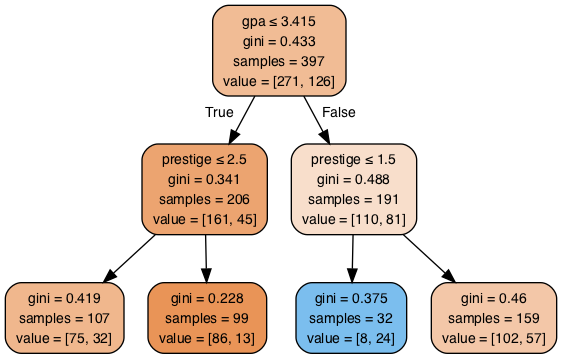

In [41]:
# max_depth = 2
dot_data = StringIO()  

export_graphviz(dtc2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X_class.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

### Max Depth 3:

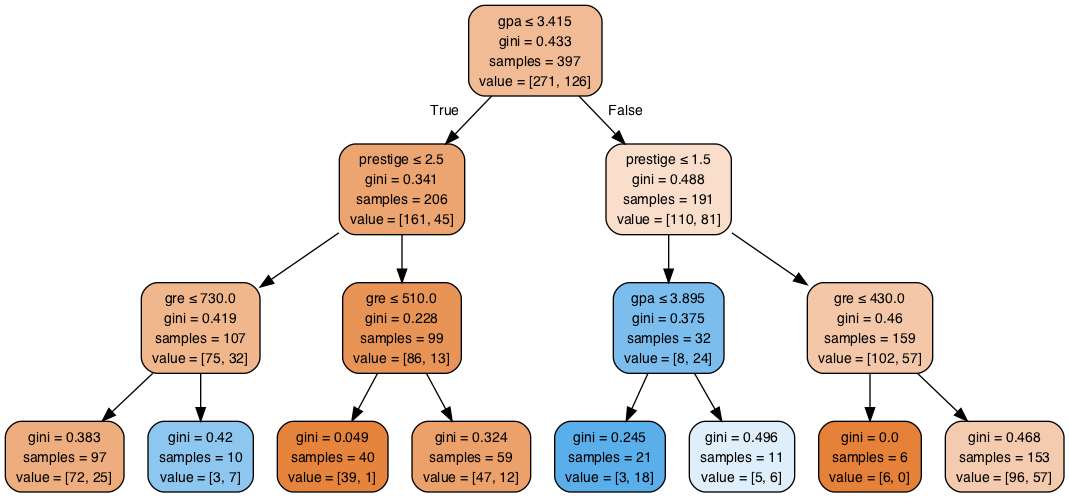

In [42]:
# max_depth = 3
dot_data = StringIO()  

export_graphviz(dtc3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X_class.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

### Max Depth None

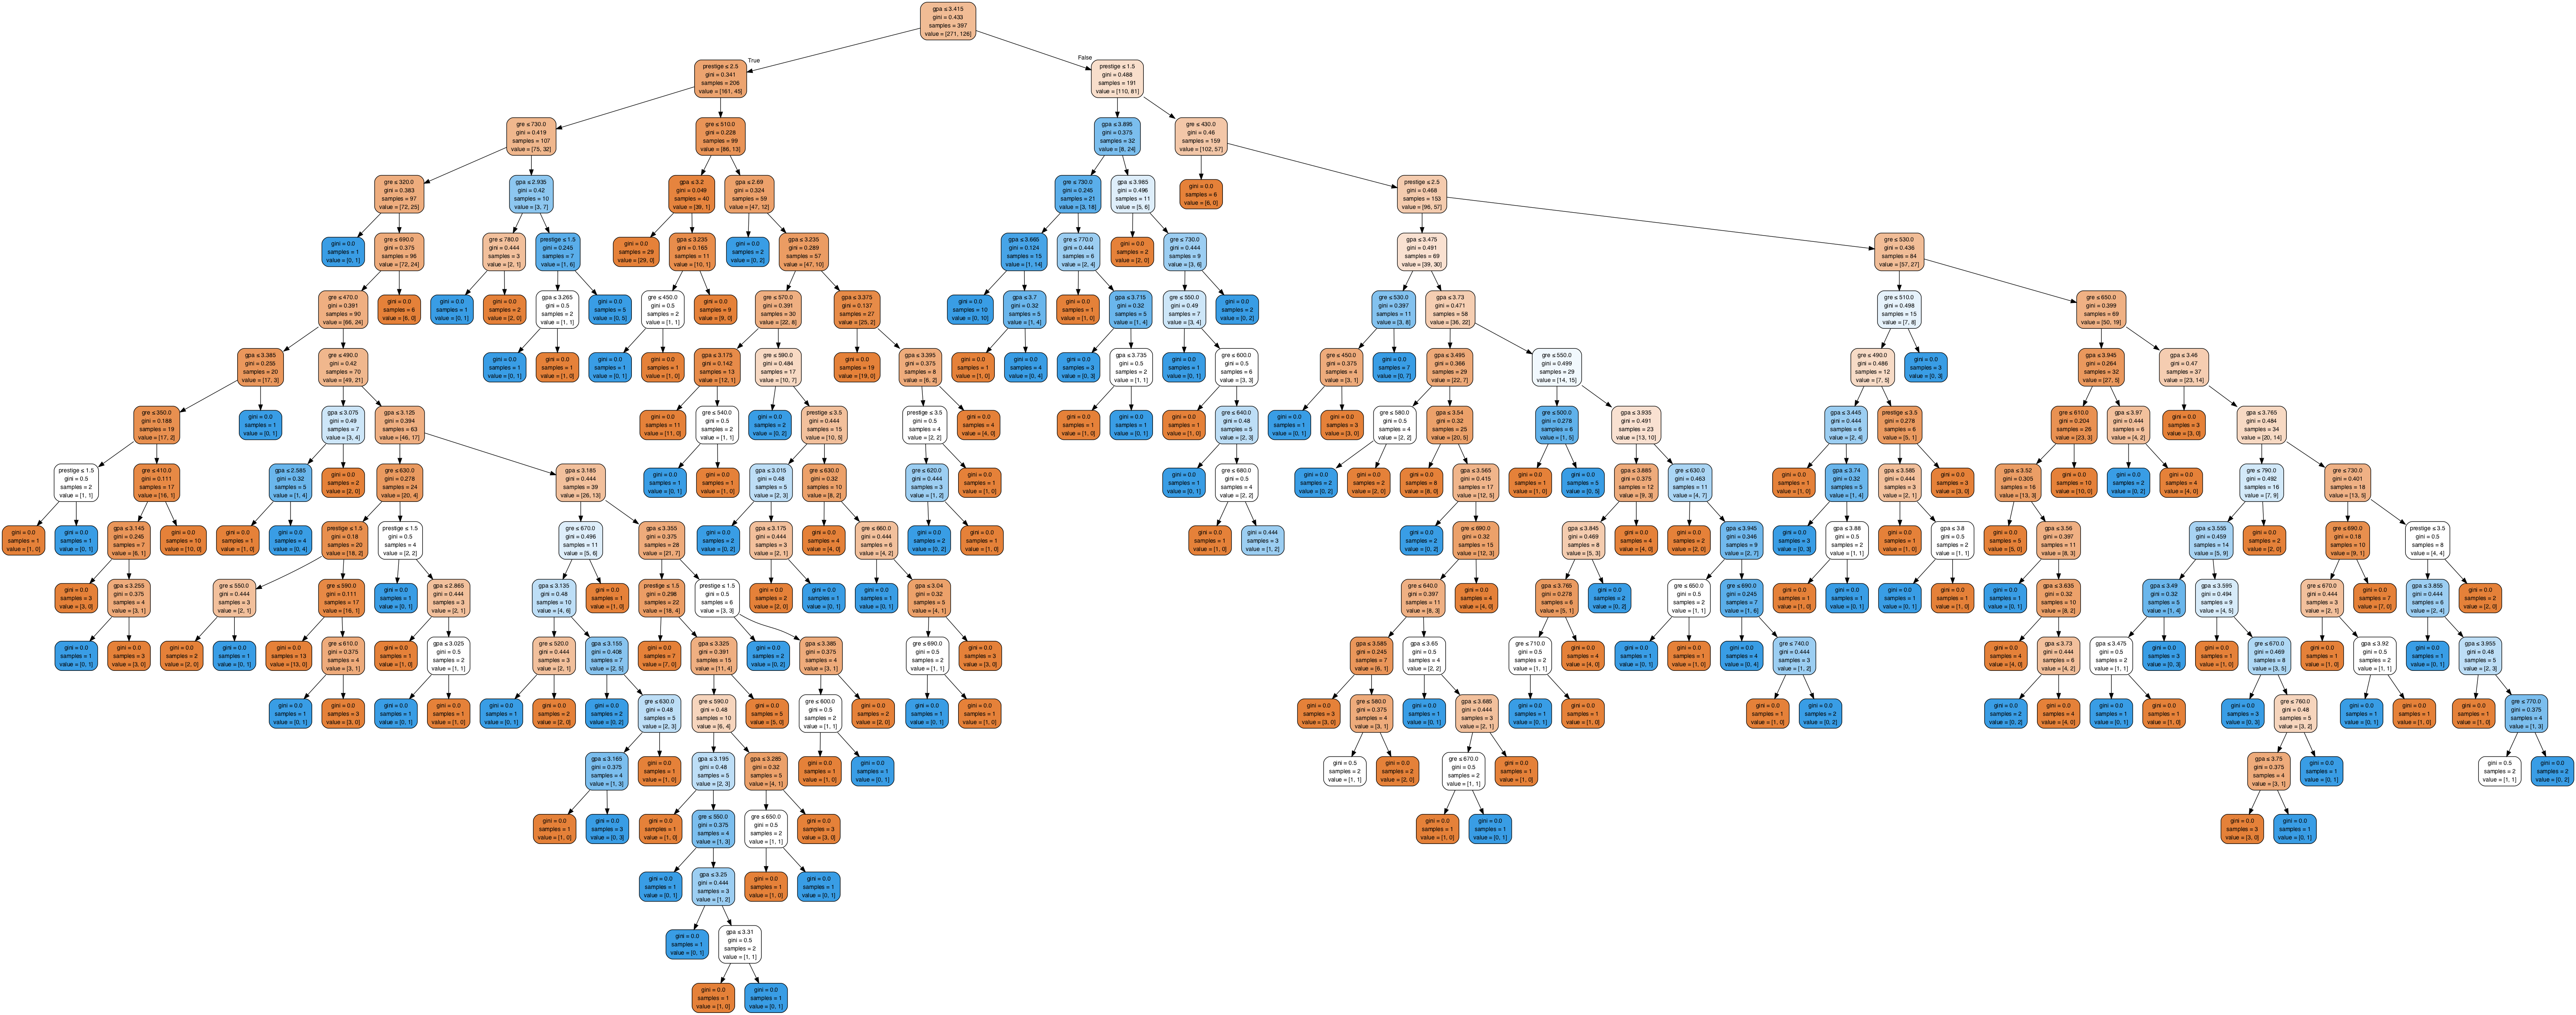

In [44]:
# max_depth = 4
dot_data = StringIO()  

export_graphviz(dtcN, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X_class.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

---

### Using GridSearchCV to find the best decision tree classifier

As decision trees that are unrestricted will just end up over fitting the training data. Decision tree regression and classification models in sklearn offer a variety of ways to "pre-prune" (by restricting the how many times the tree can branch and what it can use).

Measure           | What it does
------------------|-------------
max_depth         | How many nodes deep can the decision tree go?
max_features      | Is there a cut off to the number of features to use?
max_leaf_nodes    | How many leaves can be generated per node?
min_samples_leaf  | How many samples need to be included at a leaf, at a minimum?  
min_samples_split | How many samples need to be included at a node, at a minimum?

It is not always best to search over _all_ of these in a grid search, unless you have a small dataset. Many of them while not redundant are going to have very similar effects on your model's fit.

Check out the documentation here:

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

---

## Switch over to the college stats dataset

We are going to be predicting whether or not a college is public or private. Set up your X, y variables accordingly.

In [45]:
col = pd.read_csv('datasets/College.csv')

In [46]:
col.head()

Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0   70        78       18.1           12    7041         60  
1   29        30       12.2           16   10527         56  
2   53        66       12.9           30    8735         54  
3   92        97        7.7           37   19016         59  
4   76        72       11.9            2   10922         15

In [47]:
# We are going to use a lambda mapping to change the values of Privat from {'Yes' 'No'} to {1, -1}
y =col.Private.map(lambda x: 1 if x == 'Yes' else -1)
X = col.iloc[:, 2:]


---

## Set up and run the gridsearch on the data

In [48]:
# Import GridsearchCV
from sklearn.model_selection import GridSearchCV

In [104]:
col.shape

(777, 19)

In [54]:
# Define gridsearch params using a dictionary where the key:value pairs are the hyperparameters and the range of values:
dtc_params = {
    'max_depth':[None,1,2,3,4],
    'criterion': ['gini', 'entropy'],
    'max_features':[None,'log2','sqrt',2,3,4,5],
    'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50]
}

# set the gridsearch
dtc_gs = GridSearchCV(DecisionTreeClassifier(), dtc_params, cv=5, verbose=1)



In [105]:
# Fit the College data:
dtc_gs.fit(X, y)

Fitting 5 folds for each of 770 candidates, totalling 3850 fits


[Parallel(n_jobs=1)]: Done 3850 out of 3850 | elapsed:   13.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [None, 1, 2, 3, 4], 'criterion': ['gini', 'entropy'], 'max_features': [None, 'log2', 'sqrt', 2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

### Find the Best Estimator among the Decision Trees 

In [59]:
# Use the .best_estimator_ function:
dtc_best = dtc_gs.best_estimator_
print("Best Parameter Values:", dtc_gs.best_params_)
print("Best Score Found:", dtc_gs.best_score_)

Best Parameter Values: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_split': 5}
Best Score Found: 0.9227799227799228


### Not bad?

---

## Feature Importances

The model has an attribute called `.feature_importances_` which can tell us which features were most important vs. others. It ranges from 0 to 1, with 1 being the most important.

An easy way to think about the feature importance is how much that particular variable was used to make decisions. Really though, it also takes into account how much that feature contributed to splitting up the class or reducing the variance.

A feature with higher feature importance reduced the criterion (impurity) more than the other features.

Below, see the feature importances for each variable predicting private vs. not, sorted by most important feature to least.

In [60]:
# Create a DataFrame to house the feature importances you get from the dtc_best model:
fi = pd.DataFrame({
        'feature':X.columns,
        'importance':dtc_best.feature_importances_
    })

# Sort the feature importances from largest to smallest to see what was important:
fi.sort_values('importance', ascending=False, inplace=True)
fi

feature  importance
5   F.Undergrad    0.418327
13    S.F.Ratio    0.129099
7      Outstate    0.111356
8    Room.Board    0.078436
6   P.Undergrad    0.078191
14  perc.alumni    0.059553
3     Top10perc    0.026773
1        Accept    0.015843
15       Expend    0.014544
10     Personal    0.011425
16    Grad.Rate    0.010296
12     Terminal    0.010236
4     Top25perc    0.009088
2        Enroll    0.007250
11          PhD    0.006910
0          Apps    0.006600
9         Books    0.006072

## How would you explain the lowest scores?

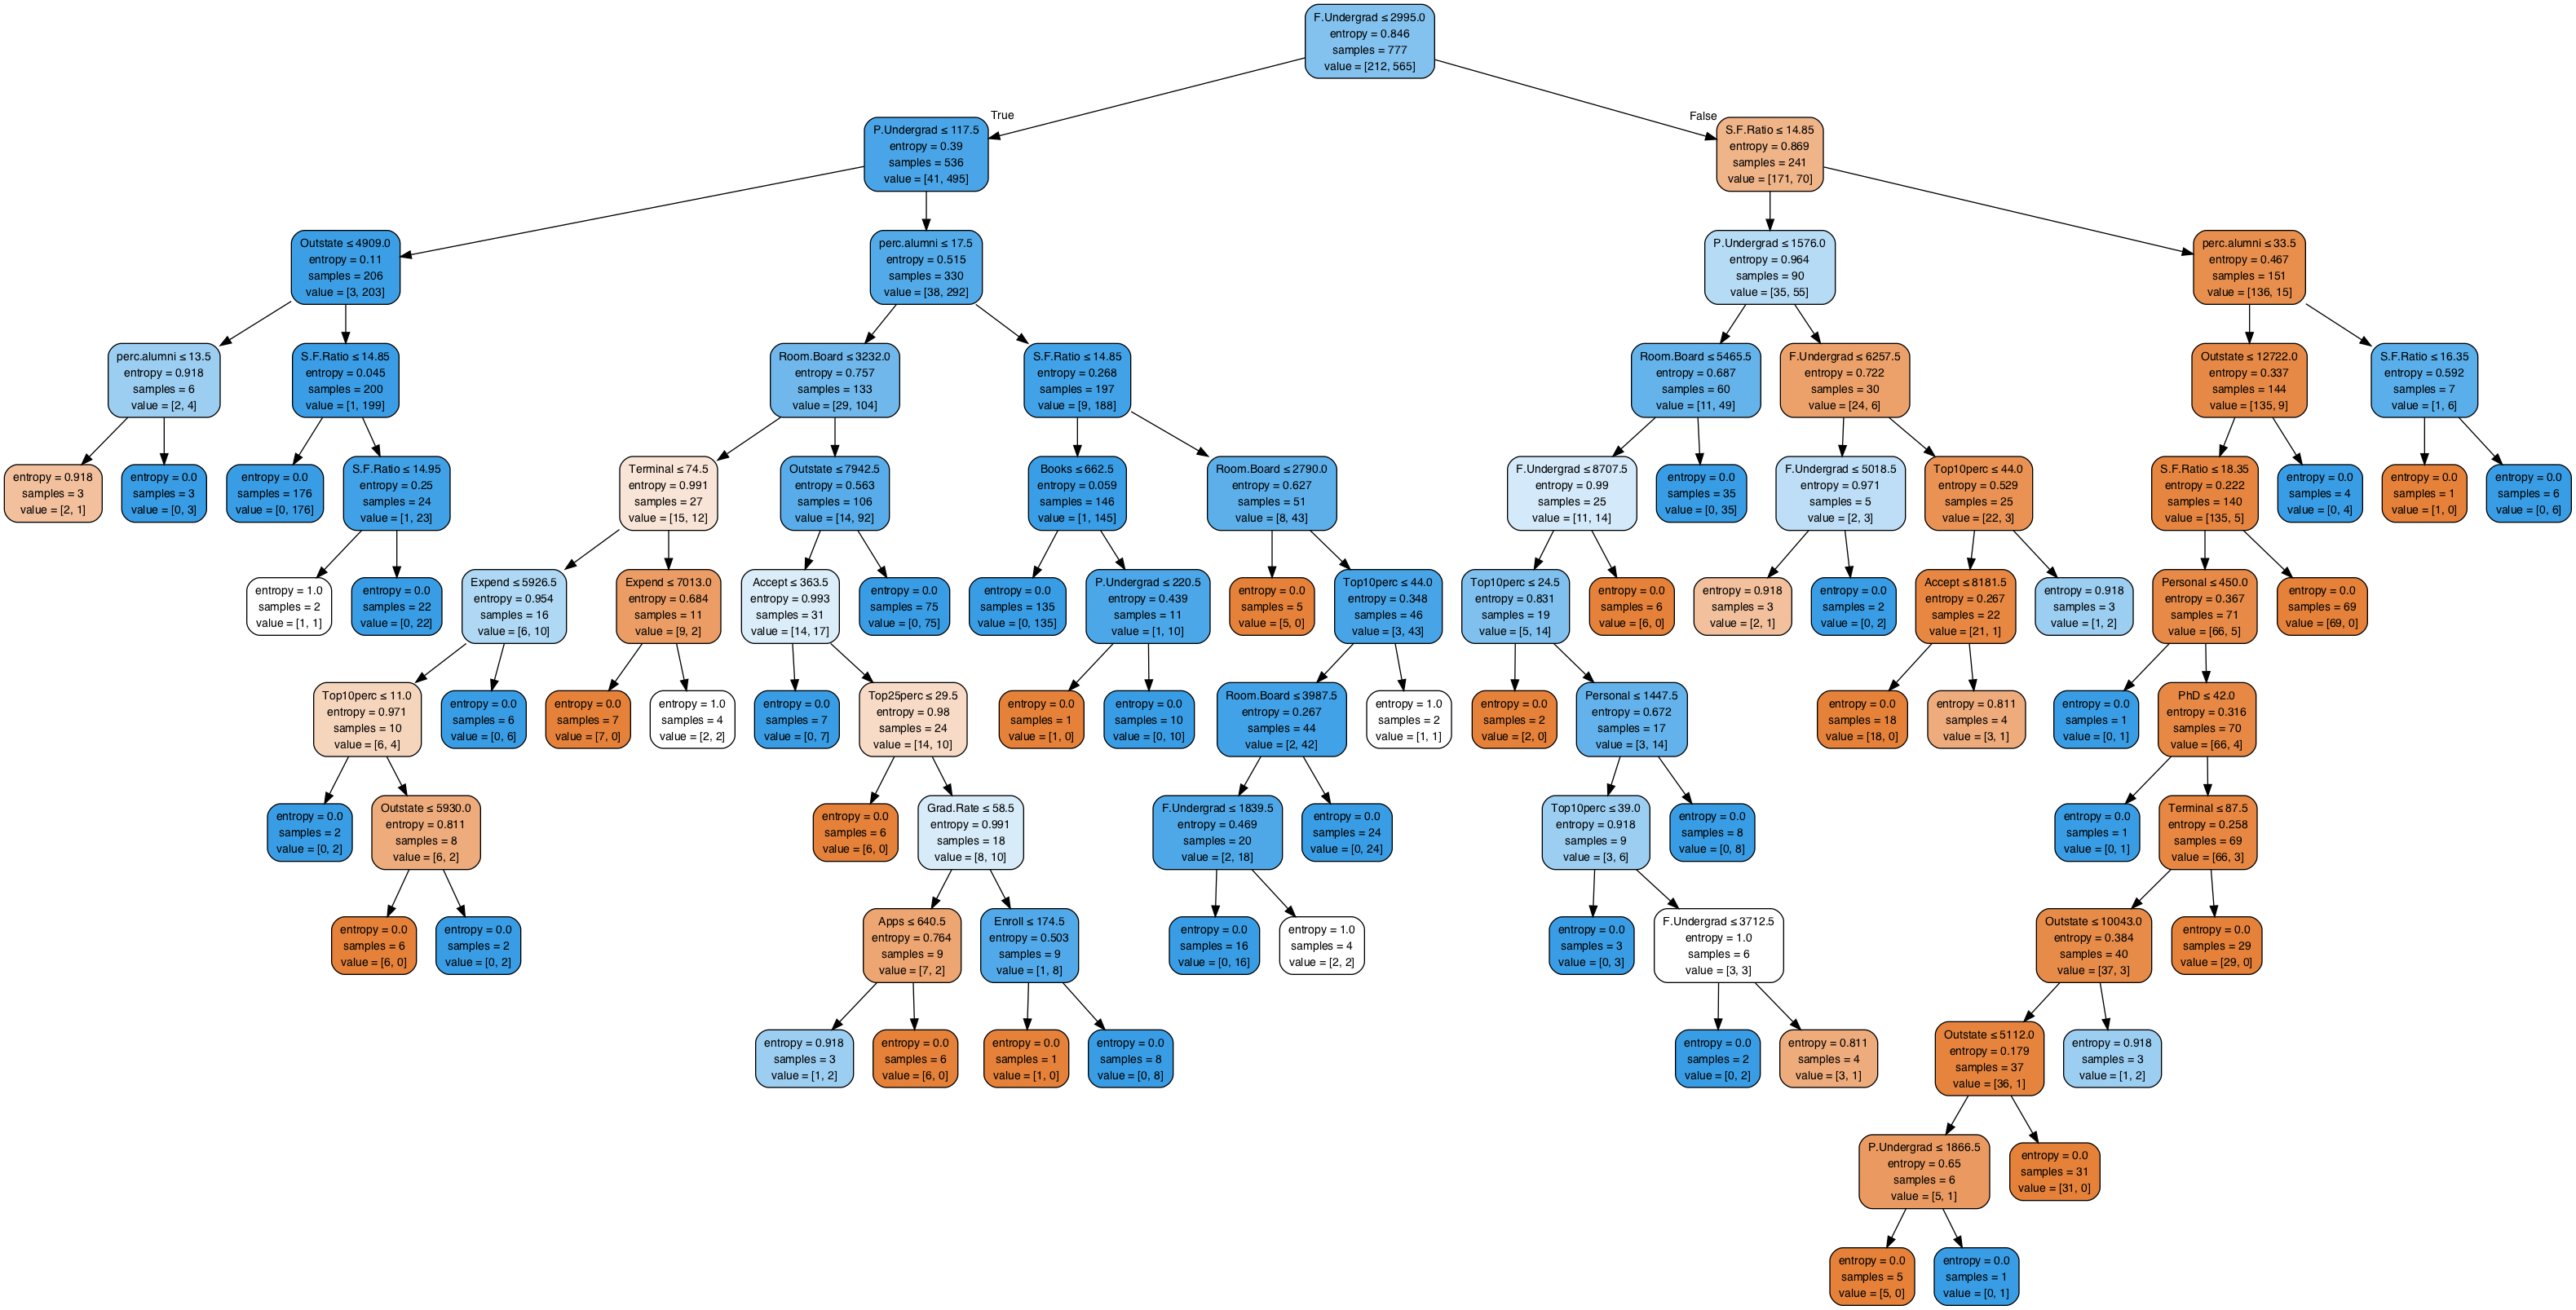

In [61]:
# max_depth = 3
dot_data = StringIO()  

export_graphviz(dtc_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

---

# Ensemble Methods

### Two types of ensemble techniques:

## Averaging Methods

In averaging methods, the driving principle is to build several estimators independently and then to average their predictions. On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced. Bagging uses averaging. 

## Boosting Methods

The other family of ensemble methods are boosting methods, where base estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble.

In [91]:
# Import packages
from sklearn.ensemble import BaggingClassifier

### Our best parameter values just found are:
`Best Parameter Values: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_split': 5}
Best Score Found: 0.9227799227799228`

In [96]:
clf = DecisionTreeClassifier(max_depth=None)
bagger = BaggingClassifier(clf, max_samples=1.0, n_estimators=20)

## Cross validate Bagging Method:
- Past best score was: 0.92

In [101]:
scores = cross_val_score(bagger, X, y, cv=6)
print('Scores for each fold: ', scores)

Scores for each fold:  [0.9389313  0.90769231 0.94573643 0.91472868 0.9379845  0.96124031]
